In [82]:
using Plots

In [83]:
function attribute!(Plots=Plots)
    #=Style settings can refer to:
    https://juliadatascience.io/aog_custom
    https://docs.juliaplots.org/latest/tutorial/#Plot-Attributes
    https://www.matecdev.com/posts/julia-plotting-font-size.html
    https://gr-framework.org/fonts.html
    =#
    st = Dict(
        :framestyle => :box,
        :lw => 1.5,
        :fontfamily =>"Computer Modern",
        :tickfontsize => 13,
        :titlefontsize => 13,
        :guidefontsize => 13,
        :legendfontsize => 12,
        :minorgrid => true
    )
    Plots.default(framestyle = st[:framestyle], 
                    minorgrid = st[:minorgrid],
                    titlefontsize = st[:titlefontsize],
                    tickfontsize = st[:tickfontsize],
                    guidefontsize = st[:guidefontsize],
                    fontfamily = st[:fontfamily],
                    lw = st[:lw]
                    )
    return nothing
end
attribute!()

In [84]:
include("./src/potential.jl")
include("./src/latt_para.jl")

lattice_params! (generic function with 1 method)

In [85]:
# average mass of baryons unit: GeV
mN = (938.272 + 939.566) / 2 
mΣ = (1189.37 + 1192.64 + 1197.45) / 3 
mΛ = 1115.68 
mΞ = (1314.8+1321.3) / 2 

# average mass of mesons unit: MeV
mKbar = (493.68 + 497.65) / 2 
mπ = (139.570*2 + 134.977) / 3
mK = mKbar 
mη = 547.51

a = [-2.0, -1.84, -2.25, -2.52]
mch = [[mπ, mΣ],[mKbar, mN], [mη, mΛ], [mK, mΞ]]

params = Dict(
    :mch => mch,
    :decons_vec => [92.4, 92.4, 92.4, 92.4] .* 1.123,
    :m_meson => (mπ, mK)
)
params[:threshold] = [sum(mch[i]) for i in 1:4]

4-element Vector{Float64}:
 1331.1923333333334
 1434.584
 1663.19
 1813.715

In [86]:
dd = [
 0.1528504511430132
-0.26938582503269237
-0.06559898593888372
-0.22534174744829905] .* 1e-3
d = Dict(:d1 => dd[1], :d2 => dd[2], :d3 => dd[3], :d4 => dd[4])

Dict{Symbol, Float64} with 4 entries:
  :d4 => -0.000225342
  :d2 => -0.000269386
  :d1 => 0.00015285
  :d3 => -6.5599e-5

In [87]:
b = Dict(:b0 => -0.43e-3, :bD => 0.08e-3, :bF => -0.27e-3)
#d = Dict(:d1 => -0.36e-3, :d2 => 0.09e-3, :d3 => 0.1e-3, :d4 => -0.59e-3)


mπ, mK = 137, 495
mch = params[:mch]
decons = params[:decons_vec]

4-element Vector{Float64}:
 103.76520000000001
 103.76520000000001
 103.76520000000001
 103.76520000000001

In [88]:
VLO!(1450, mch, decons, n=4)

4×4 Matrix{ComplexF64}:
 -0.0480325-0.0im   0.0219426+0.0im        -0.0-0.0im  -0.0109267-0.0im
  0.0219426+0.0im  -0.0714025-0.0im  -0.0410886-0.0im        -0.0-0.0im
       -0.0-0.0im  -0.0410886-0.0im        -0.0-0.0im   0.0222892+0.0im
 -0.0109267-0.0im        -0.0-0.0im   0.0222892+0.0im  -0.0178333-0.0im

In [89]:
VNLO!(1390, mπ, mK, mch, b, d, decons, n=4)

4×4 Matrix{ComplexF64}:
 0.00489387+0.0im    0.0107693+0.0im  0.00171086+0.0im  0.00756271+0.0im
  0.0107693+0.0im  -0.00939488-0.0im   0.0359495-0.0im  -0.0191949-0.0im
 0.00171086+0.0im    0.0359495-0.0im   0.0239163+0.0im   0.0180915+0.0im
 0.00756271+0.0im   -0.0191949-0.0im   0.0180915+0.0im    0.007755+0.0im

In [90]:
VNLO_old!(1390, mπ, mK, mch, b, d, decons, n=4)

4×4 Matrix{ComplexF64}:
 0.00489273+0.0im    0.0107694+0.0im  0.00171481+0.0im  0.00757603+0.0im
  0.0107694+0.0im  -0.00937736-0.0im    0.035906+0.0im  -0.0190818-0.0im
 0.00171481+0.0im     0.035906+0.0im   0.0241428+0.0im   0.0182463+0.0im
 0.00757603+0.0im   -0.0190818-0.0im   0.0182463+0.0im  0.00844654+0.0im

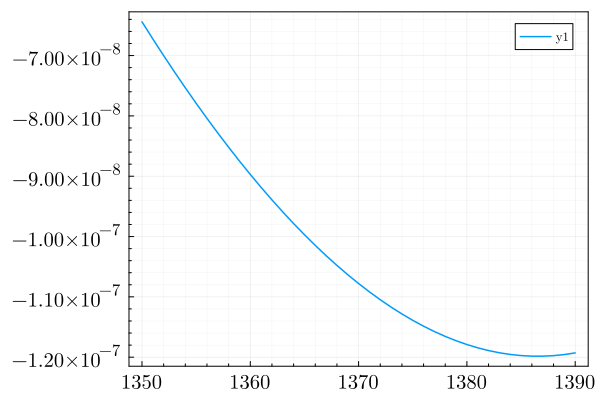

In [91]:
w = 1350:1390
vlo1 = [VNLO!(ww, mπ, mK, mch, b, d, decons, n=4)[2] for ww in w]
vlo2 = [VNLO_old!(ww, mπ, mK, mch, b, d, decons, n=4)[2] for ww in w]

plot(w, real(vlo1) - real(vlo2) )

In [92]:
qcm!(1450, 494, 983)

0.0 + 132.32620081988483im

In [93]:
qcm!(1250, 983, 494)

0.0 + 362.04087702711143im

In [1]:
using Optim

In [2]:
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2

f (generic function with 1 method)

In [8]:
x0 = [0.0, 0.0]
res = optimize(f, x0)

 * Status: success

 * Candidate solution
    Final objective value:     3.525527e-09

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    60
    f(x) calls:    117


In [14]:
x = Optim.minimizer(res)
f(x)

3.5255270584829996e-9

In [1]:
using IMinuit

In [2]:
f(x) = x[1]^2 +(x[2]-1)^2 + (x[3]-2)^4

f (generic function with 1 method)

In [3]:
function fitting!(fcn, init_x; par...)
    m = Minuit(fcn, init_x, par...)
end

fitting! (generic function with 1 method)

In [5]:
fitting!(f, [1, 1, 4], :fix_x0 => true)

MethodError: MethodError: no method matching fitting!(::typeof(f), ::Vector{Int64}, ::Pair{Symbol, Bool})

Closest candidates are:
  fitting!(::Any, ::Any; par...)
   @ Main ~/Documents/works_in_ific/lam1405_10_08_2023/energy_level_julia/potential.ipynb:1
